# Analyze Region 15 - Asia, South East

This notebook analyzes the largest glaciers in Region 15 - Asia, South East

In [1]:
import os
import os.path as op
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
from earthpy import clip as cl
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# Set Up Region Info

In [2]:
# Set region number, region name, and region index
# Once these are set, this notebook should run automatically for the specified region
region_number = "15"
region_name = "Asia, South East"

# The variable primeclass needs to be updated with the primary class of the ice complexes for the region
# This may need to be a list in some instances
# 2: icefield, 3: ice cap, 4: outlet glacier, 5: valley glacier, 6: mountain glacier
primeclass = 5 # WGI gives a value of 5

# Note for the region index, region_index_1 should be one less than the region number and 
# region_index_2 should be equal to the region number. For example, for region 1, index_1 should be set to 0 and 
# index_2 should be set to 1, etc.
region_index_1 = 14
region_index_2 = 15

# This variable sets a value to determine whether the differences between the GLIMS and RGI glacier have been checked.
# When first starting a new notebook set handled to 0
# Once the differences have been checked and handled, set to 1 to pass the check 
# in the Compare Glaciers from GLIMS and RGI section towards the middele of this notebook.
handled = 1

# Show Region

In [3]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds
    ne_raster_meta = ne_src.meta

In [4]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Extract Region outline
region_outline = glacier_regions[region_index_1:region_index_2]

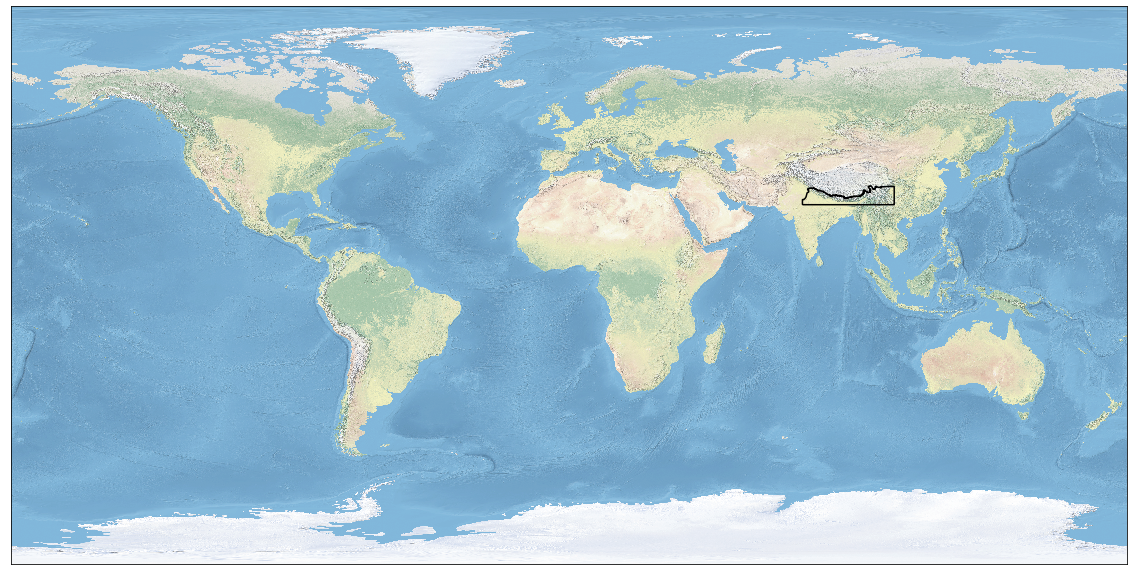

In [5]:
# Plot region outline over the natural earth
# Plot natural earth basemap
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region outline
region_outline.boundary.plot(ax=ax, color="black")

plt.show()

In [6]:
region_outline.bounds

minx  miny   maxx       maxy
14  75.4  26.0  105.0  32.039896

# Glaciers

## Open GLIMS 3 Largest Glaciers Data

In [7]:
# Open GLIMS three largest glacier outlines for this region.
glims_glaciers_fn = "data/glims/processed/largest/glims_region_" + region_number + "_largest.shp"
glims_glaciers_df = gpd.read_file(glims_glaciers_fn)

In [8]:
# Check if GLIMS glacier names are of the "NoneType" because can't print legends and such if they are
# If they are, set them to a string "NONE"
glims_df_len = len(glims_glaciers_df)
for x in range(glims_df_len):
    if glims_glaciers_df['glac_name'][x] == None:
        print("GLIMS glacier " + str(x) + " equals none")
        glims_glaciers_df.loc[x, 'glac_name'] = 'NONE'

In [9]:
glims_glaciers_df

region_no         glac_id     area  db_area  width  length  primeclass  \
0         15  G096685E29331N    0.000  179.589    0.0     0.0         0.0   
1         15  G096685E29331N  179.589  179.589    0.0     0.0         0.0   
2         15  G096685E29331N    0.000  179.589    0.0     0.0         0.0   
3         15  G096685E29331N  179.589  179.589    0.0     0.0         0.0   
4         15  G079147E30802N    0.000  176.771    0.0     0.0         0.0   
5         15  G096764E29206N    0.000  115.893    0.0     0.0         0.0   
6         15  G096764E29206N   96.283   96.283    0.0     0.0         0.0   
7         15  G096764E29206N    0.000  115.893    0.0     0.0         0.0   
8         15  G096764E29206N   96.283   96.283    0.0     0.0         0.0   

   min_elev  mean_elev  max_elev             src_date           glac_name  \
0    3975.0     5084.0    6342.0  2005-09-08T00:00:00      Yanong Glacier   
1    3969.0     5081.0    6342.0  2005-09-08T00:00:00      Yanong Glacier   
2    3975.0     5084.0    6342.0  2005-09-08T00:00:00      Yanong Glacier   
3    3969.0     5081.0    6342.0  2005-09-08T00:00:00      Yanong Glacier   
4    4084.0     5367.0    6904.0  2008-11-09T00:00:00                None   
5    4650.0     5292.0    5885.0  2005-09-08T00:00:00  Xirinongpu Glacier   
6    4284.0     5269.0    6543.0  2005-09-08T00:00:00  Xirinongpu Glacier   
7    4650.0     5292.0    5885.0  2005-09-08T00:00:00  Xirinongpu Glacier   
8    4284.0     5269.0    6543.0  2005-09-08T00:00:00  Xirinongpu Glacier   

                                            geometry  
0  POLYGON Z ((96.571254 29.398115 0, 96.57178 29...  
1  POLYGON Z ((96.57583200000001 29.397314 0, 96....  
2  POLYGON Z ((96.571254 29.398115 0, 96.57178 29...  
3  POLYGON Z ((96.57583200000001 29.397314 0, 96....  
4  POLYGON Z ((79.261948 30.956077 0, 79.26299899...  
5  POLYGON Z ((96.803044 29.180132 0, 96.802424 2...  
6  POLYGON Z ((96.734041 29.269911 0, 96.734841 2...  
7  POLYGON Z ((96.803044 29.180132 0, 96.802424 2...  
8  POLYGON Z ((96.734041 29.269911 0, 96.734841 2...

## Open RGI 3 Largest Glaciers Data

In [10]:
# Open RGI three largest glacier outlines for this region.
rgi_glaciers_fn = "data/rgi/processed/largest/rgi_region_" + region_number + "_largest.shp"
rgi_glaciers_df = gpd.read_file(rgi_glaciers_fn)

In [11]:
# Check if RGI glacier names are of the "NoneType" because can't print legends and such if they are
# If they are, set them to a string "NONE"
rgi_df_len = len(rgi_glaciers_df)
for x in range(rgi_df_len):
    if rgi_glaciers_df['Name'][x] == None:
        print("RGI glacier " + str(x) + " equals none")
        rgi_glaciers_df.loc[x, 'Name'] = 'NONE'

RGI glacier 4 equals none


In [12]:
rgi_glaciers_df

RGIId         GLIMSId   BgnDate   EndDate     CenLon     CenLat  \
0  RGI60-15.11909  G096657E29334N  20050908  -9999999  96.657000  29.334000   
1  RGI60-15.06881  G079147E30802N  20010801  -9999999  79.147205  30.801627   
2  RGI60-15.11926  G096745E29216N  20050908  -9999999  96.745000  29.216000   
3  RGI60-15.09991  G086830E28048N  20100409  -9999999  86.830000  28.048000   
4  RGI60-15.02703  G088202E27766N  20001108  -9999999  88.201782  27.765869   

  O1Region O2Region     Area  Zmin  ...  Aspect   Lmax  Status  Connect  Form  \
0       15        3  179.589  3980  ...      78  32403       0        0     1   
1       15        1  121.890  3999  ...     353  32048       0        0     0   
2       15        3   96.283  4285  ...     101  15157       0        0     1   
3       15        2   73.215  5155  ...      13  20118       0        0     0   
4       15        2   68.664  4187  ...      69  26217       0        0     0   

   TermType  Surging  Linkages                             Name  \
0         0        1         9                          Yagnung   
1         0        9         0                 Gangotri Glacier   
2         0        9         9  CN5O282B0028 Xirinongpu Glacier   
3         0        9         9     CN5O193B0142 Rongbuk Glacier   
4         0        9         9                             NONE   

                                            geometry  
0  POLYGON ((96.57583249500004 29.39731357000005,...  
1  POLYGON ((79.17424776700005 30.82317602500007,...  
2  POLYGON ((96.73404057300007 29.26991097700005,...  
3  POLYGON ((86.87850224700009 28.06345219400004,...  
4  POLYGON ((88.25193134500006 27.80569270500007,...  

[5 rows x 23 columns]

## Plot GLIMS Glaciers

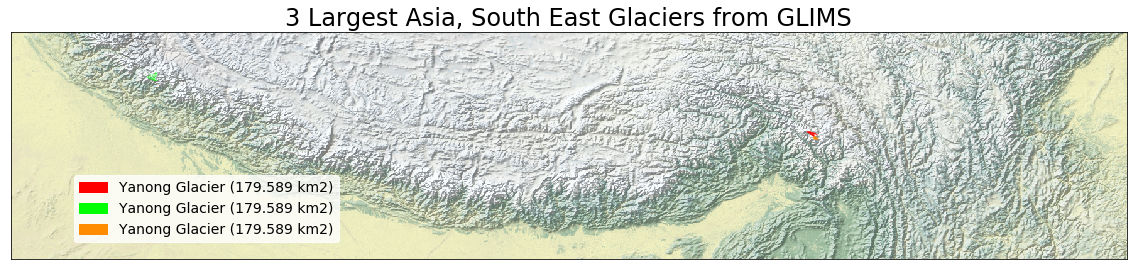

In [25]:
# Plot 3 largest glaciers on natural earth from GLIMS
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [glims_glaciers_df['glac_name'][0] + ' (' + str(glims_glaciers_df['db_area'][0]) + ' km2)',
                 glims_glaciers_df['glac_name'][1] + ' (' + str(glims_glaciers_df['db_area'][1]) + ' km2)',
                 glims_glaciers_df['glac_name'][2] + ' (' + str(glims_glaciers_df['db_area'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
glims_glaciers_df.iloc[0:1].plot(ax=ax, color='red')
glims_glaciers_df.iloc[4:5].plot(ax=ax, color='lime')
glims_glaciers_df.iloc[6:7].plot(ax=ax, color='darkorange')
ax.set_title('3 Largest ' + region_name + ' Glaciers from GLIMS', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (0.3,0.4))

plt.show()

## Plot RGI Glaciers

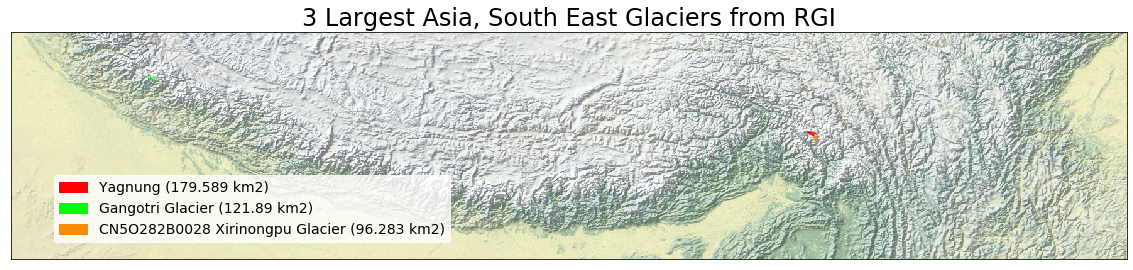

In [26]:
# Plot 3 largest glaciers on natural earth from RGI
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [rgi_glaciers_df['Name'][0] + ' (' + str(rgi_glaciers_df['Area'][0]) + ' km2)',
                 rgi_glaciers_df['Name'][1] + ' (' + str(rgi_glaciers_df['Area'][1]) + ' km2)',
                 rgi_glaciers_df['Name'][2] + ' (' + str(rgi_glaciers_df['Area'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from rgi dataframe
rgi_glaciers_df.iloc[0:1].plot(ax=ax, color='red')
rgi_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
rgi_glaciers_df.iloc[2:3].plot(ax=ax, color='darkorange')
ax.set_title('3 Largest ' + region_name + ' Glaciers from RGI', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (0.4,0.4))

plt.show()

## Compare Glaciers from GLIMS and RGI
Do they match? If yes, continue, if no, stop notebook and investigate

In [27]:
if (glims_glaciers_df['glac_name'][0] == rgi_glaciers_df['Name'][0] and 
    glims_glaciers_df['glac_name'][1] == rgi_glaciers_df['Name'][1] and 
    glims_glaciers_df['glac_name'][2] == rgi_glaciers_df['Name'][2]):
    print("They match!")
else:
    if handled != 1:
        # If this hasn't been handled, stop execution
        class StopExecution(Exception):
            def _render_traceback_(self):
                pass

        print("They do NOT Match! Stopping notebook.")
        raise StopExecution
    else:
        # If this has been handled, continue execution
        print("They do not match but this has been handled in the code below this section, so continue.")

They do not match but this has been handled in the code below this section, so continue.


## Create final shapefiles
This section creates and formats the final dataframe, plots it to make sure it looks ok, and saves it to a shapefile.

Because some of the GLIMS glaciers have the same date, they are listed multiple times. For example, Yanong Glacier (G096685E29331N) is listed 4 times. Xirinongpu Glacier (G096764E29206N) is also listed 4 times. In addition, that glacier has two different polygons - two with areas of 96.283 and two with areas of 115.893.

How GLIMS and RGI match:
* The first entry in both is Yanong Glacier, but the RGI spelling of the name is Yagnung, so need to check which is most often used. Wu (2018) calls it Yalong but Zhang (2019) calls it Yanong, so going with Yanong.
* The 5th entry in GLIMS (G079147E30802N) is the same glacier as the 2nd entry in RGI (Gangotri Glacier) expcept that the GLIMS one has an added tongue that the RGI doesn't have
* The 7th and 9th entry of GLIMS (Xirinongpu Glacier - G096764E29206N) match the 3rd entry of RGI, but the 6th and 8th entries of GLIMS (also listed as Xirinongpu Glacier) have a different polygon and different size - it looks like a tongue off the main glacier. The size listed seems too big (115.893) compared to what the polygon looks like. Perhaps the area of this is added on to the area of the main glacier and should be one polygon? When I look at the GLIMS viewier that little tonugue also has it's own ID G096818E29132N (Aza glacier) with an area that seems appropriate (12.42). I'm going to ignore this little tongue and go with the main glaicer with a size of 96.283.

### Create final dataframe

In [28]:
# Clean up glims_glaciers_df - drop uneeded rows and reset index
glims_glaciers_df.drop([1, 2, 3, 5, 7, 8], inplace = True)
glims_glaciers_df = glims_glaciers_df.reset_index(drop=True)

# Set up the final dataframe that will be used when saving the final shapefiles
# Drop columns that are not needed for the final data (use GLIMS dataframe for this)
final_data_df = glims_glaciers_df.drop(['area', 'width', 'length', 
                                        'min_elev', 'mean_elev', 'max_elev'], axis=1)

# Add region_name column
final_data_df['reg_name'] = region_name

# Add primary class (primeclass) column. 
final_data_df['primeclass'] = primeclass

# Rename some columns
final_data_df.rename(columns={'glac_id': 'glims_id', 'db_area': 'area_km2', 
                                       'src_date': 'date'}, inplace=True)

# Add RGI ID column
final_data_df['rgi_id'] = (rgi_glaciers_df['RGIId'][0], rgi_glaciers_df['RGIId'][1], rgi_glaciers_df['RGIId'][2])

# Add area_source column that gets filled lower down
final_data_df['area_source'] = '-999'

# Reorder the columns of the dataframe
final_data_df = final_data_df[['region_no', 'reg_name', 'glac_name', 'glims_id', 'rgi_id', 
                               'primeclass', 'area_km2', 'area_source', 'date', 'geometry']]

In [29]:
final_data_df

region_no          reg_name           glac_name        glims_id  \
0         15  Asia, South East      Yanong Glacier  G096685E29331N   
1         15  Asia, South East                None  G079147E30802N   
2         15  Asia, South East  Xirinongpu Glacier  G096764E29206N   

           rgi_id  primeclass  area_km2 area_source                 date  \
0  RGI60-15.11909           5   179.589        -999  2005-09-08T00:00:00   
1  RGI60-15.06881           5   176.771        -999  2008-11-09T00:00:00   
2  RGI60-15.11926           5    96.283        -999  2005-09-08T00:00:00   

                                            geometry  
0  POLYGON Z ((96.571254 29.398115 0, 96.57178 29...  
1  POLYGON Z ((79.261948 30.956077 0, 79.26299899...  
2  POLYGON Z ((96.734041 29.269911 0, 96.734841 2...

In [30]:
# Calculate area and update dataframe as neccessary and clean the date format in the date column
# If GLIMS and RGI dates are the same year, then average the two areas.
# If GLIMS date is more recent, then use that average.
# If RGI date is more recent, then use that average. (Note I don't think this ever happens)
# Note only comparing by year because sometimes the month and day are not known. Year matching is close enough.
for x in range(3):
    # Exract and clean GLIMS date so that it is comparable to RGI date
    glims_date = glims_glaciers_df['src_date'][x][0:10].replace('-', '')
    glims_year = glims_date[0:4]
    print('glims date: ' + glims_date)
    #print('glims year: ' + glims_year)
    
    # Extract RGI date
    rgi_date = rgi_glaciers_df['BgnDate'][x]
    rgi_year = rgi_date[0:4]
    print('rgi date: ' + rgi_date)
    #print('rgi year: ' + rgi_year)
    
    if glims_year == rgi_year:
        # Average GLIMS and RGI areas
        area = np.average([glims_glaciers_df['db_area'][x], rgi_glaciers_df['Area'][x]])
        area_source = 'A'
        print('Averaging area: ' + str(area))
    elif glims_year > rgi_year:
        # Use GLIMS area for the area
        area = glims_glaciers_df['db_area'][x]
        area_source = 'G'
        print('Using GLIMS area: ' + str(area))
    elif rgi_year > glims_year:
        # Use RGI area for the area
        area = rgi_glaciers_df['Area'][x]
        area_source = 'R'
        print('Using RGI area: ' + str(area))
    else:
        print("Error. Area could not be calculated.")
    
    print('')
    # Set the area in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('area_km2')] = area
    final_data_df.iloc[x, final_data_df.columns.get_loc('area_source')] = area_source
    
    # Clean the date format in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('date')] = glims_glaciers_df['src_date'][x][0:10]
    
# Clean up glacier names
final_data_df.iloc[1, final_data_df.columns.get_loc('glac_name')] = "Gangotri Glacier"

glims date: 20050908
rgi date: 20050908
Averaging area: 179.589

glims date: 20081109
rgi date: 20010801
Using GLIMS area: 176.771

glims date: 20050908
rgi date: 20050908
Averaging area: 96.283



In [31]:
final_data_df

region_no          reg_name           glac_name        glims_id  \
0         15  Asia, South East      Yanong Glacier  G096685E29331N   
1         15  Asia, South East    Gangotri Glacier  G079147E30802N   
2         15  Asia, South East  Xirinongpu Glacier  G096764E29206N   

           rgi_id  primeclass  area_km2 area_source        date  \
0  RGI60-15.11909           5   179.589           A  2005-09-08   
1  RGI60-15.06881           5   176.771           G  2008-11-09   
2  RGI60-15.11926           5    96.283           A  2005-09-08   

                                            geometry  
0  POLYGON Z ((96.571254 29.398115 0, 96.57178 29...  
1  POLYGON Z ((79.261948 30.956077 0, 79.26299899...  
2  POLYGON Z ((96.734041 29.269911 0, 96.734841 2...

### Plot final dataframe to check accuracy

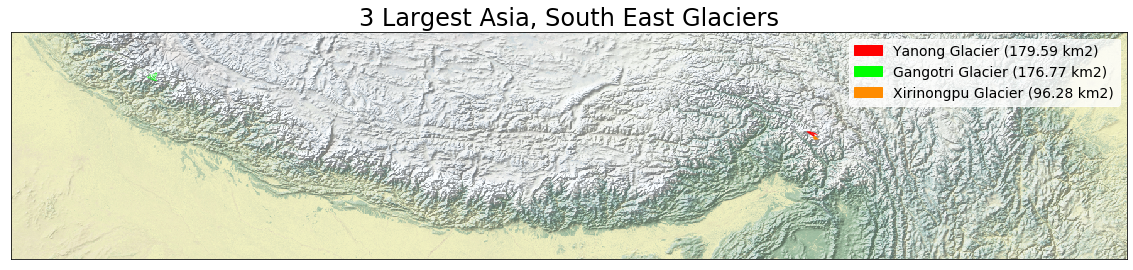

In [32]:
# Check that the geodataframe wasn't corrupted from these changes by plotting the data
# Plot 3 largest glaciers on natural earth from GLIMS
# Set up legend. Note that the sizes come from an average of GLIMS and RGI. 
# See wgms-glacier-project/data/comparison/compare-glims-rgi.xlsx
legend_colors = ['red', 'lime', 'darkorange']
legend_labels = [final_data_df['glac_name'][0] + ' (' + str(round(final_data_df['area_km2'][0], 2)) + ' km2)',
                 final_data_df['glac_name'][1] + ' (' + str(round(final_data_df['area_km2'][1], 2)) + ' km2)',
                 final_data_df['glac_name'][2] + ' (' + str(round(final_data_df['area_km2'][2], 2)) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
final_data_df.iloc[0:1].plot(ax=ax, color='red')
final_data_df.iloc[1:2].plot(ax=ax, color='lime')
final_data_df.iloc[2:3].plot(ax=ax, color='darkorange')
ax.set_title('3 Largest ' + region_name + ' Glaciers', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

### Create shapefile from the final dataframe

In [33]:
# Write dataframe to shapefile and save to zip if it doesn't already exist
zipfile_fn = "data/final-dataset/region-" + region_number + "-largest-glaciers.zip"
if os.path.exists(zipfile_fn) == False:
    # Create the shapefile
    final_data_fn = "data/final-dataset/region-" + region_number + "-largest-glaciers.shp"
    final_data_df.to_file(driver='ESRI Shapefile', filename=final_data_fn)
    
    # Zip up the shapefile
    zipfile_fn = ws.zipshp(final_data_fn, Delete=True)
    print("Creating zipfile: " + zipfile_fn)
else:
    print(zipfile_fn + " already extists")

Creating zipfile: data/final-dataset\region-15-largest-glaciers.zip
